# Re-Entry Systems 
## [1] Ballistic Entry

Equations of motion

\begin{equation}
m \frac{dV}{dt} = -D - mg \sin{\gamma}
\end{equation}

\begin{equation}
m V\frac{d\gamma}{dt} = L - mg \cos{\gamma}\left(1 - \frac{V^2}{g r}\right)
\end{equation}


\begin{equation}
\frac{dr}{dt} = \frac{dh}{dt} = V \sin{\gamma}
\end{equation}

**Ballistic Entry: Flight Path**

Ballistic flight, assumption of "No Lift"

\begin{equation}
V\frac{d\gamma}{dt} = - g \cos{\gamma}\left(1 - \frac{V^2}{g r}\right)
\end{equation}

Using the fact that:

\begin{equation}
\frac{d\gamma}{dt} = \frac{d\gamma}{dh} \frac{dh}{dt} = \frac{d\gamma}{dh} V \sin{\gamma}
\end{equation}

we can write:

\begin{equation}
V^2\sin{\gamma} \frac{d\gamma}{dh} = - g \cos{\gamma}\left(1 - \frac{V^2}{V^2_c}\right)
\end{equation}

rearranging:

\begin{equation}
\tan{\gamma} \frac{d\gamma}{dh} = - g \left(\frac{1}{V^2} - \frac{1}{V^2_c}\right) \simeq 0
\end{equation}

we find that the change in flight path angle $\gamma$ is approximately 0, meaning that it remains almost constant during flight $\gamma \simeq \gamma_E$. Therefore, the **ballistic entry** trajectory is approximately a straight line, defined by the initial entry angle $\gamma_E$.

**Ballistic Entry: Altitude - Velocity profile**

Using the fact that:


\begin{equation}
\frac{dV}{dt} = \frac{dV}{dh} \frac{dh}{dt} = V \sin{\gamma}\frac{dV}{dh} 
\end{equation}

we can plug that into the *drag* equation, and dividing by $m g \sin{\gamma}$, we obtain:

\begin{equation}
\frac{V}{g} \frac{dV}{dh} = - \frac{D}{m g \sin{\gamma}} - 1
\end{equation}

since $\gamma$ is small and the drag is large, the first term dominates over 1, and we can simplify to:

\begin{equation}
\frac{V}{g} \frac{dV}{dh} \simeq - \frac{\frac{1}{2}\rho V^2 S C_D}{m g \sin{\gamma}} = - \frac{\rho V^2}{2 K \sin{\gamma}}
\end{equation}

where $K=\frac{m g}{S C_D}$ is the **ballistic parameter**.
Rearrainging:

\begin{equation}
\frac{dV}{dh} = - \frac{1}{2}\frac{g \rho dh}{K\sin{\gamma}} = \frac{1}{2}\frac{dp}{K\sin{\gamma}}
\end{equation}

solving for $V$ and using the formula for the standard atmosphere $p = \rho R T = \rho_0 g /\beta\exp{(-\beta h)}$:

\begin{equation}
\ln{\frac{V}{V_E}} = \frac{1}{2}\frac{p - p_E}{K\sin{\gamma}}
\end{equation}


\begin{equation}
\frac{V}{V_E} = \exp{\left(\frac{1}{2}\frac{g \rho_0 \exp{(-\beta h)}}{K \beta\sin{\gamma_E}} \right)}
\end{equation}

Which tells us that the ratio between the velocity at a given height $V(h)$ and the initial entry velocity $V_E$ depends on $h$ and other parameters such as the **ballistic parameter** $K$, the initial flight path angle $\gamma_E$, and the characteristics of the atmosphere $\rho_0$, $\beta$.

This allows us to investigate the impact of the different parameters on the altitude-velocity profile. In the code below we look at how the **ballistic parameter** $K$ and the entry angle $\gamma_E$ affect the profile.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rc('font', family='serif')
plt.rc('text', usetex=False)

# Parameters
g = 9.81            # gravity [m / s^2]
rho0 = 1.225        # density at sea level [kg / m^3]
beta = 1 / 7050     # atmosphere height scale factor [1 / m]

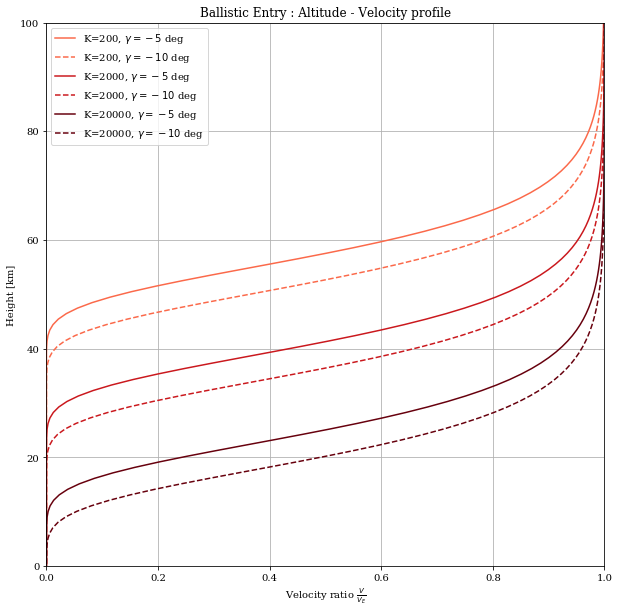

In [2]:
# We look at a height profile from 100 km to sea-level
h = 1e3 * np.linspace(100, 0, 100)

gammas = [5, 10]   # several values of entry angle [deg]
K_ballistic = [200, 2000, 20000]      # ballistic coefficient [N / m^2]
colors = cm.Reds(np.linspace(0.5, 1.0, len(K_ballistic)))
linestyles = ['-', '--']

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for i, K in enumerate(K_ballistic):

    for j, gamma in enumerate(gammas):
        gamma_entry = -np.deg2rad(gamma)
        A = 0.5 * g * rho0 * np.exp(-h * beta)
        B = K * beta * np.sin(gamma_entry)
        v_ratio = np.exp(A / B)
        ax.plot(v_ratio, h / 1000, color=colors[i], linestyle=linestyles[j], 
                label="K=%d, $\gamma=-%d$ deg" % (K, gamma))

ax.set_xlim([0, 1])
ax.set_ylim([0, 100])
ax.legend()
ax.grid(True)
ax.set_xlabel(r'Velocity ratio $\frac{V}{V_E}$')
ax.set_ylabel(r'Height [km]')
ax.set_title(r'Ballistic Entry : Altitude - Velocity profile')
plt.show()

The flight path begins at the top-right corner, where the height is 100 km (entrance of the atmosphere) when the velocity is equal to the entry velocity $V_E$.
The entry vehicle decays in height very quickly at the beginning given the initial velocity, and then the atmospheric drag starts to decelerate it.

Looking at the **ballistic parameter** we can notice the following effect. As $K$ increases, meaning either a heavier vehicle ($m g$) or one capable of generating less drag $C_D S$, the vehicle penetrates deeper into the atmosphere before the drag manages to decelerate it sufficiently. For a given terminal velocity, this will be reached at lower altitudes if $K$ is larger.

With regards to the flight path angle $\gamma$ the effect is similar. Steeper entry angles make the vehicle reach lower altitudes before atmospheric drag manages to slow it down.

**Ballistic Entry: Deceleration**

One of the most important considerations for a re-entry vehicle is its maximum deceleration, as this determines the maximum mechanical load it needs to withstand during re-entry; and it's specially important for manned vehicles where we want to keep the accelerations to a minimum. In order to calculate the deceleration, we start with:


\begin{equation}
m \frac{dV}{dt} \simeq -D
\end{equation}

so that:

\begin{equation}
a = -\frac{dV}{dt} = \frac{\frac{1}{2} \rho V^2 C_D S g}{m g} = \frac{g}{2K}\rho V^2
\end{equation}

using the velocity equation from the previous section, we can obtain a formula for $\rho$:

\begin{equation}
\rho = \frac{2 K \beta \sin{\gamma_E}}{g} \ln{\frac{V}{V_E}}
\end{equation}

that we can plug back into the acceleration equation:

\begin{equation}
a = -\frac{dV}{dt} = \beta \sin{\gamma_E} V^2_E \left(\frac{V}{V_E}\right)^2 \ln{\frac{V}{V_E}}
\end{equation}

This can be used to calculate the *maximum* deceleration with $\frac{d a}{d(V / V_E)} = 0$, which gives rise to:

\begin{equation}
a_{max} = - \frac{\beta \sin{\gamma_E}}{2e} V^2_E
\end{equation}

We can also calculate the height at which that *maximum* deceleration happens:

\begin{equation}
h(a_{max}) = \frac{1}{\beta} \ln{ \left(-\frac{\rho_0 g}{K \beta \sin{\gamma_E}} \right)}
\end{equation}



/home/menduina-l/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/home/menduina-l/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


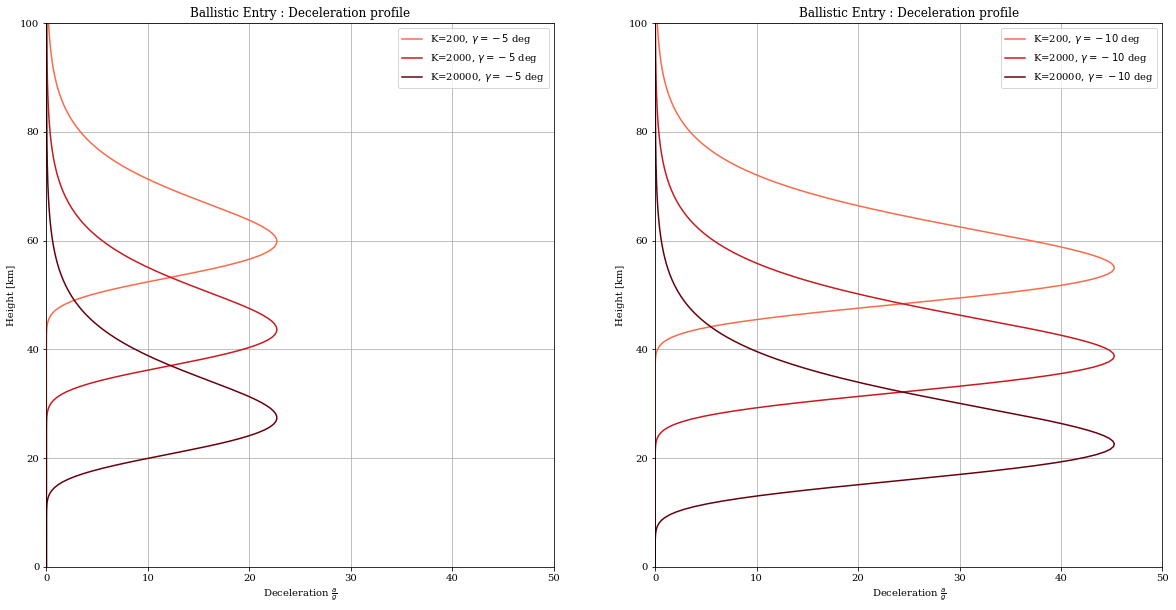

In [18]:
# We look at a height profile from 100 km to sea-level
h = 1e3 * np.linspace(100, 0, 200)
gammas = [5, 10]   # several values of entry angle [deg]
K_ballistic = [200, 2000, 20000]      # ballistic coefficient [N / m^2]
colors = cm.Reds(np.linspace(0.5, 1.0, len(K_ballistic)))
linestyles = ['-', '--']

# Assuming an entry
v_e = 7e3     # 7 km / s

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, K in enumerate(K_ballistic):
    for j, gamma in enumerate(gammas):
        gamma_entry = -np.deg2rad(gamma)

        A = 0.5 * g * rho0 * np.exp(-h * beta)
        B = K * beta * np.sin(gamma_entry)
        v_ratio = np.exp(A / B)

        a = beta * np.sin(gamma_entry) * v_e**2 * v_ratio**2 * np.log(v_ratio**2) / g
        ax = axes[j]
        ax.plot(a, h / 1000, color=colors[i], 
                    label="K=%d, $\gamma=-%d$ deg" % (K, gamma))

for ax in axes:
    ax.set_xlim([0, 50])
    ax.set_ylim([0, 100])
    ax.legend()
    ax.grid(True)
    ax.set_xlabel(r'Deceleration $\frac{a}{g}$')
    ax.set_ylabel(r'Height [km]')
    ax.set_title(r'Ballistic Entry : Deceleration profile')
plt.show()

Looking at the two equations and the deceleration profiles from the figure above, we can draw the following conclusions. 

The first thing to note is that the *maximum* deceleration does **not** depend on the **ballistic parameter**. For a given flight profile, all vehicles experience the same *maximum* deceleration independent of their mass and drag characteristics. But the altitude at which this deceleration happens varies. As we saw for the altitude-velocity profile, heavier vehicles suffer the maximum deceleration deeper into the atmosphere.

The second thing to note is that the height at which the *maximum* deceleration takes place does **not** depend on the initial velocity $V_E$. In contrast, both the *maximum* deceleration and height depend on the initial entry angle $\gamma_E$. Steeper flight paths lead to larger decelerations, suggesting the need to properly control the angle $\gamma$ to minimise mechanical loads. Steeper paths also move the height of maximum deceleration deeper into the lower atmosphere.